# Sale of apartments in Modi'in

## Dataset of sale apartments in the second half of 2020, Modi'in Israel

In [1]:
# import libraries
import sklearn
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import seaborn as sns
import numpy as np # linear algebra
import pandas as pd

In [2]:
print(np.__version__)
print(sns.__version__)
print(pd.__version__)
import sys
print(sys.version)
print(sklearn.__version__)

1.21.5
0.11.2
1.4.1
3.9.7 (default, Sep 16 2021, 16:59:28) [MSC v.1916 64 bit (AMD64)]
1.0.2


In [3]:
df = pd.read_csv(r'C:\Users\abedw\DataBases\modiin_2020.csv')

### read data

In [4]:
df.head()

,ID,DATE,PRICE,PRICE_VALUE,TYPE,PART_SOLD,CITY,YEAR_building,sq_meter,ROOMS
0,005956-0091-005-18,01/06/2020,2330000,2330000,Apartment in a building,1.0,modiin,2022,121,5.0
1,080073-0011-000-00,10/06/2020,1389146,1389146,Apartment in a building,1.0,modiin,2020,108,4.0
2,080072-0026-000-00,15/06/2020,2114064,2114064,Apartment in a building,1.0,modiin,2020,104,4.0
3,005569-0036-052-00,01/06/2020,2020000,20000000,Apartment in a building,1.0,modiin,1997,100,3.0
4,080073-0029-002-00,01/06/2020,2152682,2152682,Apartment in a building,1.0,modiin,2020,128,5.0


In [5]:
df.shape

(1451, 10)

In [6]:
df.describe()

,PRICE,PRICE_VALUE,PART_SOLD,YEAR_building,sq_meter,ROOMS
count,1.451000e+03,1.451000e+03,1451.000000,1451.000000,1451.000000,1451.000000
mean,1.750642e+06,1.763033e+06,0.947851,1883.753963,105.990351,3.862164
std,7.052201e+05,8.525338e+05,0.179198,498.833165,38.577337,1.345858
min,1.750000e+04,1.750000e+04,0.010000,0.000000,0.000000,0.000000
25%,1.261812e+06,1.261812e+06,1.000000,2009.000000,83.000000,3.000000
50%,1.628392e+06,1.628392e+06,1.000000,2020.000000,109.000000,4.000000
75%,2.125000e+06,2.125547e+06,1.000000,2020.000000,127.000000,5.000000
max,4.300000e+06,2.000000e+07,1.000000,2023.000000,261.000000,8.000000


In [7]:
df.dtypes

ID                object
DATE              object
PRICE              int64
PRICE_VALUE        int64
TYPE              object
PART_SOLD        float64
CITY              object
YEAR_building      int64
sq_meter           int64
ROOMS            float64
dtype: object

### clean data

In [8]:
df['PART_SOLD'].value_counts()

1.000    1328
0.500      64
0.333      20
0.111       9
0.250       6
0.050       5
0.062       4
0.083       3
0.750       3
0.300       2
0.650       1
0.010       1
0.166       1
0.400       1
0.900       1
0.100       1
0.350       1
Name: PART_SOLD, dtype: int64

In [9]:
df.drop(df.index[df['PART_SOLD'] != 1], inplace=True)
df.drop(df.index[df['sq_meter'] == 0], inplace=True)

In [10]:
df['ROOMS'].value_counts()

4.0    471
5.0    364
3.0    359
6.0     80
4.5     14
3.5     11
5.5      2
2.0      2
7.0      1
Name: ROOMS, dtype: int64

In [11]:
df.ROOMS.astype(int)

0       5
1       4
2       4
3       3
4       5
       ..
1446    4
1447    6
1448    6
1449    5
1450    3
Name: ROOMS, Length: 1304, dtype: int32

In [12]:
df['YEAR_building'].value_counts()

2020    803
2022     85
2018     39
2017     31
2000     27
2019     26
1998     25
2004     23
1999     22
2010     20
2005     18
1997     16
2013     16
2007     14
2012     13
1996     13
2008     13
2003     11
2009     11
2015     11
2006     10
2002      9
1995      9
2021      8
2011      8
2001      6
2016      6
2014      6
1994      3
2023      1
1990      1
Name: YEAR_building, dtype: int64

In [13]:
df['YEAR_building'].replace(0, 2000, inplace=True)

In [14]:
df['sq_meter'].value_counts()

82     123
110     64
109     60
108     55
127     46
      ... 
181      1
155      1
152      1
197      1
177      1
Name: sq_meter, Length: 125, dtype: int64

In [16]:
df1 = df.drop(['ID','CITY','TYPE','DATE','PART_SOLD'], axis=1)
X_col = df1.columns

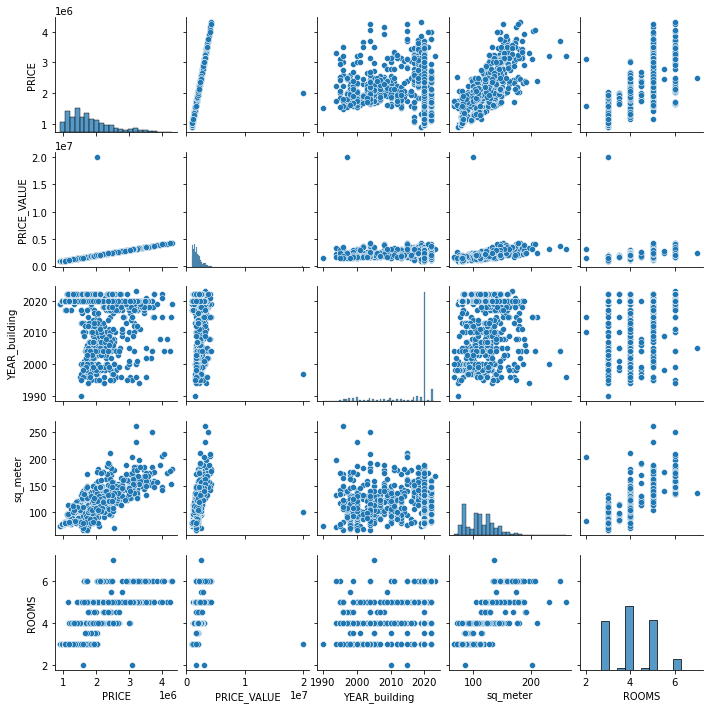

In [17]:
sns.pairplot(df1, height=2)

In [18]:
df1.describe()

,PRICE,PRICE_VALUE,YEAR_building,sq_meter,ROOMS
count,1.304000e+03,1.304000e+03,1304.000000,1304.000000,1304.000000
mean,1.825931e+06,1.839719e+06,2016.254601,112.986963,4.129218
std,6.614800e+05,8.311595e+05,7.340605,26.851726,0.897244
min,9.077920e+05,9.077920e+05,1990.000000,67.000000,2.000000
25%,1.337916e+06,1.337916e+06,2017.000000,89.000000,3.000000
50%,1.685222e+06,1.685222e+06,2020.000000,109.000000,4.000000
75%,2.170246e+06,2.171236e+06,2020.000000,128.000000,5.000000
max,4.300000e+06,2.000000e+07,2023.000000,261.000000,7.000000


In [19]:
pd.options.display.float_format = '{:,.2f}'.format

In [20]:
df1.corr()

,PRICE,PRICE_VALUE,YEAR_building,sq_meter,ROOMS
PRICE,1.00,0.80,-0.28,0.77,0.67
PRICE_VALUE,0.80,1.00,-0.27,0.61,0.51
YEAR_building,-0.28,-0.27,1.00,-0.13,0.06
sq_meter,0.77,0.61,-0.13,1.00,0.84
ROOMS,0.67,0.51,0.06,0.84,1.00


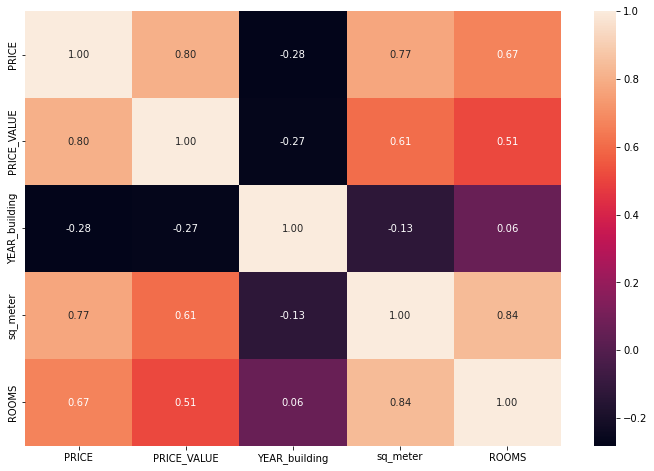

In [21]:
plt.figure(figsize=(12,8))
sns.heatmap(df1.corr(), annot=True, fmt='.2f')
plt.show()

In [22]:
y = df1['PRICE'].values

In [23]:
X = df1[['PRICE_VALUE','YEAR_building','sq_meter','ROOMS']].values

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

In [26]:
from sklearn.linear_model import LinearRegression

In [56]:
model = LinearRegression()

In [57]:
model.fit(X_train,y_train)

LinearRegression()

In [58]:
model.coef_

array([ 3.47726751e-01, -1.08557996e+04,  9.26982233e+03,  1.04691281e+05])

In [59]:
model.intercept_

21596679.284321316

plt.figure(figsize=(14,10))
sns.regplot(x=X_train,y=y_train)
plt.xlabel('Number of rooms')
plt.ylabel('price')
plt.show()

In [60]:
# linear model here isn't very helpful i think random forest would be better option in this scenario

In [61]:
from sklearn.metrics import r2_score

In [70]:
y_train_pred= model.predict(X_train)
y_test_pred= model.predict(X_test)

In [71]:
r2_score(y_train, y_train_pred)

0.7626004744824453

In [72]:
r2_score(y_test, y_test_pred)

0.8646715616205528

In [73]:
from sklearn.metrics import mean_absolute_error

In [77]:
mean_absolute_error(y_train, y_train_pred)

211397.8595831647

In [78]:
mean_absolute_error(y_test, y_test_pred)

189586.92548412623

### our Linear Regression model did well with an error margin of 189k

### let's tree decision tree 

In [40]:
from sklearn.ensemble import ExtraTreesClassifier

In [41]:
xt_clf = ExtraTreesClassifier(random_state=0)

In [68]:
xt_clf.fit(X_train, y_train)

ExtraTreesClassifier(random_state=0)

In [76]:
xt_clf_y_pred= xt_clf.predict(X_train)
xt_clf_test_pred= xt_clf.predict(X_test)

In [79]:
mean_absolute_error(y_train, xt_clf_y_pred)

0.0

In [80]:
mean_absolute_error(y_test, xt_clf_test_pred)

22663.35632183908

### decision tree did much better here passing 100% in train data and with error margin of only 22k on the test data